In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu = lambda u0 : (u0**2+2)/(u0*np.sqrt(u0**2+4))

2.5*np.log10(mu(1))

0.31909063137913257

Text(0, 0.5, '$\\sigma_{mag}$')

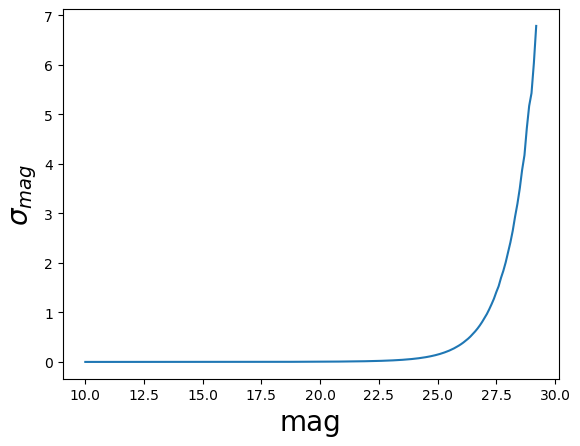

In [3]:
import pandas as pd
snr = pd.read_csv("snr_Roman.txt", sep=" ", names=["mag","err_mag"])
plt.plot(snr["mag"], snr["err_mag"])
plt.xlabel("mag",fontsize=20)
plt.ylabel("$\\sigma_{mag}$",fontsize=20)

/tmp/ipykernel_78810/2943092598.py:4: RuntimeWarning: divide by zero encountered in divide
  mu = lambda u0 : (u0**2+2)/(u0*np.sqrt(u0**2+4))


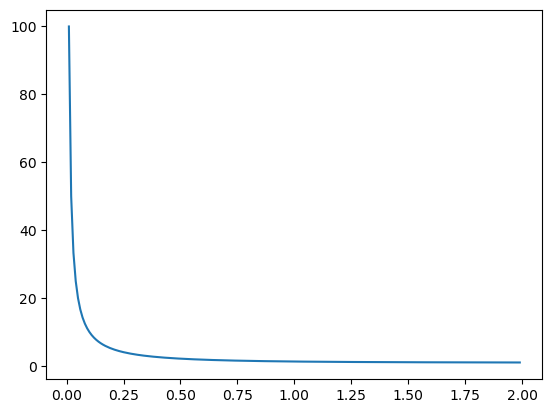

In [4]:
u0 = np.arange(0,2,0.01)
plt.plot(u0, mu(u0))


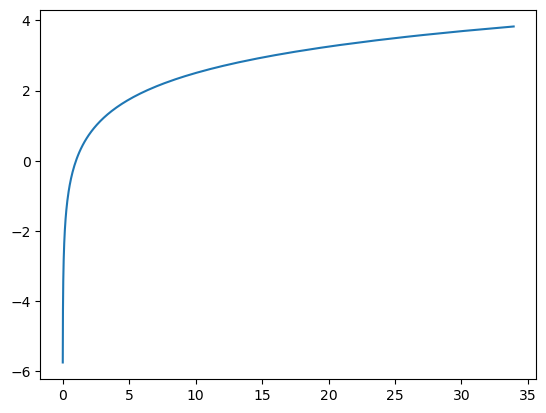

In [8]:
plt.plot(5*snr['err_mag'],2.5*np.log10(5*snr['err_mag']))